#### Program Name: loan-status-prediction.ipynb
#### Author: Momodou Jallow
#### Purpose: Predicts whether a person is eligible for loan or not.

### PROBLEM STATEMENT
Consider a financial institution that gives out loan to people. But before giving a loan to a person, the institution looks at different criteria to infer whether a person is eligible for loan or not.

### WORK FLOW
1. Data
2. Data Preprocessing and Visualization
3. Train/Test Split
4. Machine Learning Model: since this is a classification, I have decided to use the Logistic Regression Model.
5. New Data
6. Predictions

#### Importing the Dependencies

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Processing

In [117]:
loan_data = pd.read_csv("Loan_Approval_Data.csv")

# Display the first 5 rows
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [118]:
# Number of rows and columns 
loan_data.shape

(614, 13)

In [119]:
# Display the features 
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

###### The data has 13 features. The target variable is Loan_status and the rest of the features are determinants of the outcome of the target variable using the predictive machine learning model. Except for Loan_ID which has no effect on the outcome.

In [120]:
# Statistical measures(only for features with numeric data type)
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### The average income of people that applied for the loan is 5403.46. And 25% of the loan applicants have income less than 2877.50, and  about half of them have income less than 3812.50. 75% of them do not have up to 5795.00 income. 

#### Dealing with Missing Values

In [121]:
# Number of missing values in each column
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

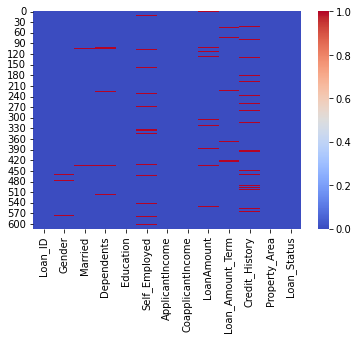

In [122]:
sns.heatmap(loan_data.isnull(), cmap = 'coolwarm')

we can observed that Credit_History has the most missing data followed by Self_Employed. Some of the columns such as ApplicantIcome, Poperty_Area, and Loan_Staus have no missing values.

Imputation would not be a good choice. This is because most of the values in the data are categorical. As a consequence, all null values would be dropped.

In [123]:
# Drop missing values
loan_data.dropna(inplace = True)

In [124]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Data Visualization

<Axes: xlabel='Loan_Status', ylabel='count'>

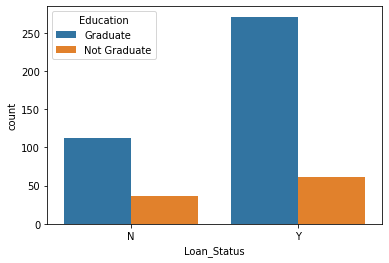

In [125]:
# Education and Loan_Status
sns.countplot(x = 'Loan_Status', hue = 'Education', data = loan_data)

Applicants who graduated their degree are more likely to be given loan than those who did not graduate.

<Axes: xlabel='Loan_Status', ylabel='count'>

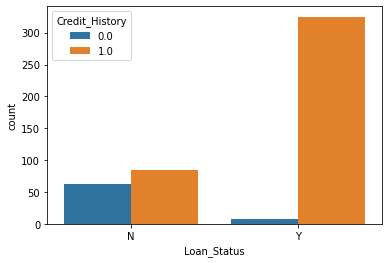

In [126]:
# Credit History and Loan_Status
sns.countplot(x = 'Loan_Status', hue = 'Credit_History', data = loan_data)

Loan applicants with good credit history are very much likely to be given loan.While applicants with poor credit history are very much likely to be rejected for loan.

<Axes: ylabel='Frequency'>

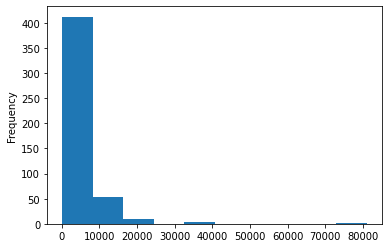

In [127]:
loan_data["ApplicantIncome"].plot.hist()

Most of the applicants have income less than 10,000.

#### Label Encoding
Machine learning models work well with numeric data type. Ergo, we will convert all columns containing string data type to numeric data types.

In [128]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [129]:
loan_data.replace({'Loan_Status':{'N':0, 'Y':1},
                   'Gender':{'Male':1, 'Female':0},
                  'Married':{'Yes':1, 'No':0},
                  'Self_Employed':{'No':0, 'Yes':1},
                  'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2},
                  'Education':{'Graduate':1, 'Not Graduate':0}},
                 inplace = True)

In [130]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [131]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [132]:
# Replace 3+ with 4(if the number of depents is more than 3 then enter 4)
loan_data = loan_data.replace(to_replace = '3+' , value = 4)

In [133]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

#### Separating the Data and the Label

In [134]:
X = loan_data.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
y = loan_data['Loan_Status']

In [135]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


### Machine Learning Model: Logistic Regression model

In [136]:
# model instantiation
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

In [137]:
# Accuracy score of the model
predictions = logreg_model.predict(X_test)
model_accuracy_score = accuracy_score(predictions, y_test)
model_accuracy_score

0.8333333333333334

### Making a Predictive System

In [138]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [139]:
# give the model input data from the table of which the outcome is known as see whether it will get it right.
#excluding the last column because it is the target variable
#choosing row 2:
input_data = (1, 1, 0, 1, 1, 3000, 0.0, 66.0, 360.0, 1.0, 2)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)
predictions = logreg_model.predict(input_data)
if(predictions[0] == 1):
    print("Approved for loan.")
else:
    print("Not approved for loan.")

Approved for loan.


Which is the outcome we expected.